# About Project

Instascrap is a powerful web scraping tool designed to extract valuable information and data from Instagram. Using the Selenium framework, this project allows users to programmatically interact with Instagram's web interface, enabling the automated collection of content related to a specific topic.

## Project Objective
The primary objective of Instabot is to simplify the process of data extraction from Instagram by providing a user-friendly and customizable tool. By leveraging the capabilities of Selenium, the project aims to enable users to scrape data, such as usernames, hashtags, and user information, relevant to their chosen topic.

In [1]:
# Importing libraries and starting the driver
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
from collections import OrderedDict 
import time
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
driver = webdriver.Edge(executable_path = '/msedgedriver')
driver.get("https://www.instagram.com/")

C:\Users\Ishan\AppData\Local\Temp\ipykernel_27700\823236478.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Edge(executable_path = '/msedgedriver')
Incompatible release of msedgedriver (version 113.0.1774.7) detected in PATH: C:\Users\Ishan\msedgedriver.exe


In [14]:
# Paste your ID and Password
username = 'SAMPLE USERNAME'
password = 'SAMPLE PASSWORD'

In [15]:
# Initializing  wait object
wait = WebDriverWait(driver, 10)

## Login into instagram
Logging in instagram account using the following function:

In [16]:
def LogIn(username, password):
    try :
        #locating username textbox and sending username
        user_name = wait.until(EC.presence_of_element_located((By.NAME,'username')))
        user_name.send_keys(username)
        #locating password box and sending password
        pwd = driver.find_element_by_name('password')
        pwd.send_keys(password)
        #locating login button 
        button = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="loginForm"]/div[1]/div[3]/button/div')))
        button.submit()
        #Save Your Login Info? : Not Now
        pop = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="react-root"]/section/main/div/div/div/div/button')))
        pop.click()
        
    except TimeoutException :
        print ("Something went wrong! Try Again")

#Login to your Instagram Handle
LogIn(username, password)

## Searching for topic

Locating the search button in instagram and then searching for a particular topic about which we will scrap the data.

In [17]:
def search(s):
    try:
        #locating serch bar and sending text
        search_box = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'XTCLo')))
        search_box.send_keys(s)
        #waiting till all searched is located
        wait.until(EC.presence_of_element_located((By.CLASS_NAME,'yCE8d')))
        #extracting all serched handle
        handle_names = driver.find_elements_by_class_name('yCE8d')
        names = []
        #extracting username
        for i in handle_names :
            if i.text[0] != '#' :
                names.append(i.text.split('\n')[0])             

        time.sleep(5)
        #clearing search bar
        driver.find_element_by_class_name('coreSpriteSearchClear').click()
 
        return names
    
    except TimeoutException :
        print('No Search Found!')
    
#extracting all the names of the Instagram Handles that are displayed in list after typing YOUR_WORD usimg search(YOUR_WORD)
name_list = search(YOUR_WORD)
for i in name_list :
    print(i)

dilsefoodie
foodtalkindia
foodmaniacinthehouse
food.darzee
yourfoodlab
dilsefoodie_
food
foodnetwork
insiderfood
foodiesfeature
foodplanet001
delhifoodguide
food_belly11
food_lunatic
delhifoodie
bangalore_foodjunkies
food_and_makeup_lover
foodgastic_amdavadi
street_food_chandigarh
buzzfeedfood
thefoodranger
hmm_nikhil
pune_food_blogger
food_junc
sattorifoodlab
foodie_girl_sneha
hyderabad.food.diaries
indianfood_lovers
foodofchennai
ndtv_food
foodelhi
fityetfoodie
foodiesdelhite
foodys
food_affair


## Top 10 instagram relevant accounts
Finding the top accounts related to our topic.

In [18]:
# As instagram shows the most relevant accounts of a topic at a moment, we will extract first 10 followers and then arrange them on the basis of most followers
#Adding top 10 accounts
handles_list = ['dilsefoodie','foodtalkindia','foodmaniacinthehouse','food.darzee','yourfoodlab','dilsefoodie_','food',
               'foodnetwork','foodinsider','foodiesfeature']

Top 5 instagram handles which have the highest number of followers :
foodnetwork -> 1262437
insiderfood -> 3010717
yourfoodlab -> 2614574
dilsefoodie -> 1004547
foodtalkindia -> 305460


Number of posts these handles have done in the previous 3 days : -
foodnetwork 27
foodinsider 5
yourfoodlab 6
dilsefoodie 3
foodtalkindia 1


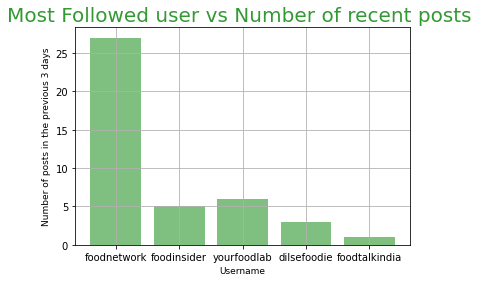

In [19]:
#Function for getting top 5 handle which have highest number of followers
def top_5_handles(lst):
    try:
        #dct contains username with number of followers
        dct = {}
        for i in lst :
            #This fuction will search a user and open that profile
            search_open_profile(i)
            time.sleep(2)
            #Locating followers of user
            followers = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'g47SY')))[1]
            # Replacing ',' with '' and converted into int
            dct[i] = int(followers.get_attribute('title').replace(',' , ''))
        #Top 5 most followed user
        count = 0
        res = OrderedDict()
        for i in sorted(dct, key=dct.get, reverse=True):
            res[i] = dct[i]
            count += 1
            if(count >= 5) : 
                break
                
        return res
    except TimeoutException :
        print ("Something went wrong! Try Again")
top_handles = top_5_handles(handles_list)
print('Top 5 instagram handles which have the highest number of followers :')
for uname in top_handles:
    print(uname,'->',top_handles[uname])
print("")
print("") 
#This function returns number of post posted by user in n days
def count_of_post(day):
    try :
        #Locating first post
        post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'v1Nh3')))
        post.click()
        
        count = 0 
        while True :
            #Getting date of the the post
            temp = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_1o9PC')))
            #Getting date in string format
            date_string = temp.get_attribute('datetime')
            #Converting into date format
            date = datetime.strptime(date_string[0:19], "%Y-%m-%dT%H:%M:%S")
            #Taking differnce between today's date and post posted date
            if (datetime.now() - date).days > day :
                break
            else :
                count += 1
            #Locating next button
            next_but = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'coreSpriteRightPaginationArrow')))
            next_but.click()
        #closing the post
        close=driver.find_element_by_xpath("/html/body/div[4]/div[3]/button")
        close.click()
        return count
    
    except TimeoutException :
        print ("Something went wrong! Try Again")

total_post_count = {}
for i in top_handles :
    search_open_profile(i)
    time.sleep(2)
    count = count_of_post(3)
    total_post_count[i] = count
print('Number of posts these handles have done in the previous 3 days : -')
for i in total_post_count:
    print(i,total_post_count[i])
    
#Using total_post_count to get username and number of post
x = total_post_count.keys()
y = total_post_count.values()
plt.bar(x,y,color='g',alpha=0.6)
plt.ylabel("Number of posts in the previous 3 days",size=10)
plt.xlabel("Username",size=10)
plt.title('Most Followed user vs Number of recent posts ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

## List of Hashtags
Scraping the hashtags used in posts related to our topic.

In [9]:
def extract_content(lst):
    try :
        hashtags_list = []
        for user in lst:
            #This fuction will search a user and open that profile
            search_open_profile(user)
            time.sleep(2)
            #just for scrolling to getting post
            driver.execute_script('window.scrollTo(0, 3000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)
            #locating the post of the user
            posts = driver.find_elements_by_class_name('v1Nh3')
            for post in posts[:10]:
                post.click()
                time.sleep(2)
                #locating all hashtag used in this post
                hashtags=driver.find_elements_by_class_name("xil3i")
                for hashtag in hashtags:
                    #appending in list
                    hashtags_list.append(hashtag.text)  
                
                #locating close button and clicking on it
                close=driver.find_element_by_xpath("/html/body/div[4]/div[3]/button")
                time.sleep(1)
                close.click()
        return hashtags_list
    
    except TimeoutException :
        print ("Something went wrong! Try Again")

handles = list(total_post_count.keys())
hashtags = extract_content(handles)
print(hashtags)

['#VivsTips', '#DeliciousMissBrown', '#WhatADissapointment', '#FreakshowCakes', '#WorstCooks', '#WorstCooks', '#WorstCooks', '#WorstCooks', '#HalloweenBakingChampionship', '#SouthernKitchen', '#arizona', '#statefair', '#corndog', '#chili', '#cincinnati', '#midwest', '#kfc', '#kfclocker', '#kfcjapan', '#ukranian', '#newyorkcity', '#food', '#dumplings', '#amazon', '#amazonprimeday', '#primeday', '#primeday2020', '#kitchendeals', '#friedchicken', '#atlanta', '#chicken', '#thaifriedchicken', '#friedchicken', '#thaifood', '#losangeles', '#recipes', '#pulao', '#foodporn', '#brightwin', '#foodiesofinstagram', '#foodlover', '#rice', '#recipeoftheday', '#mumbaifoodie', '#sanjyotkeer', '#mumbaistreetfood', '#mumbaifood', '#recipe', '#foodie', '#foodstagram', '#dosa', '#dosalover', '#indianclicks', '#indiancuisine', '#streetfood', '#recipe', '#foodie', '#indiancuisine', '#streetfood', '#foodporn', '#comfortfood', '#streetphotography', '#sanjyotkeer', '#food', '#navratri', '#noonionnogarlic', '#fo

In [20]:
dct = {}
words_list = []
for word in hashtags:
    dct[word] = dct.get(word,0) + 1
    
for i in sorted(dct, key=dct.get, reverse=True):
    words_list.append([i,dct[i]])
    print(i,dct[i])

#dilsefoodie 9
#sanjyotkeer 8
#foodporn 7
#streetfood 7
#recipe 6
#foodie 6
#comfortfood 6
#WorstCooks 4
#food 4
#recipeoftheday 4
#recipes 3
#foodiesofinstagram 3
#LesRochesConnect 3
#LesRochesWayOfLife 3
#GlionConnect 3
#GlionSpirit 3
#friedchicken 2
#mumbaifoodie 2
#mumbaistreetfood 2
#mumbaifood 2
#foodstagram 2
#indiancuisine 2
#yourfoodlab 2
#frankie 2
#paneer 2
#ContestAlert 2
#VivsTips 1
#DeliciousMissBrown 1
#WhatADissapointment 1
#FreakshowCakes 1
#HalloweenBakingChampionship 1
#SouthernKitchen 1
#arizona 1
#statefair 1
#corndog 1
#chili 1
#cincinnati 1
#midwest 1
#kfc 1
#kfclocker 1
#kfcjapan 1
#ukranian 1
#newyorkcity 1
#dumplings 1
#amazon 1
#amazonprimeday 1
#primeday 1
#primeday2020 1
#kitchendeals 1
#atlanta 1
#chicken 1
#thaifriedchicken 1
#thaifood 1
#losangeles 1
#pulao 1
#brightwin 1
#foodlover 1
#rice 1
#dosa 1
#dosalover 1
#indianclicks 1
#streetphotography 1
#navratri 1
#noonionnogarlic 1
#rolls 1
#streetstyle 1
#yummyfood 1
#noodles 1
#noodle 1
#reelsinstagram 1

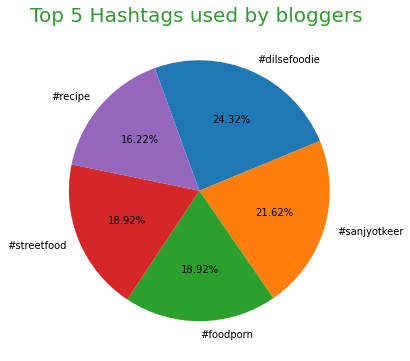

In [21]:
hashtag_name = [words_list[0][0],words_list[1][0],words_list[2][0],words_list[3][0],words_list[4][0]]
count = [words_list[0][1],words_list[1][1],words_list[2][1],words_list[3][1],words_list[4][1]]
plt.figure(figsize=(12,6))
plt.pie(count,labels=hashtag_name,autopct='%0.2f%%',radius=1,counterclock=False,startangle=110)
plt.title('Top 5 Hashtags used by bloggers ',fontsize=20, color='green',alpha=0.8)
plt.show()

## Conclusion
In conclusion, the Instagram Data Scraper project offers immense value by providing valuable insights into the vast and dynamic world of Instagram. Through automated data extraction and analysis, users can gain a deeper understanding of user behavior, content trends, and popular hashtags on the platform.
While using this scraper, it is crucial to exercise responsible and ethical scraping practices, respecting the terms of service and privacy of Instagram users.

#### Thank you and I hope this InstaScrap data scraper will be helpful to you.